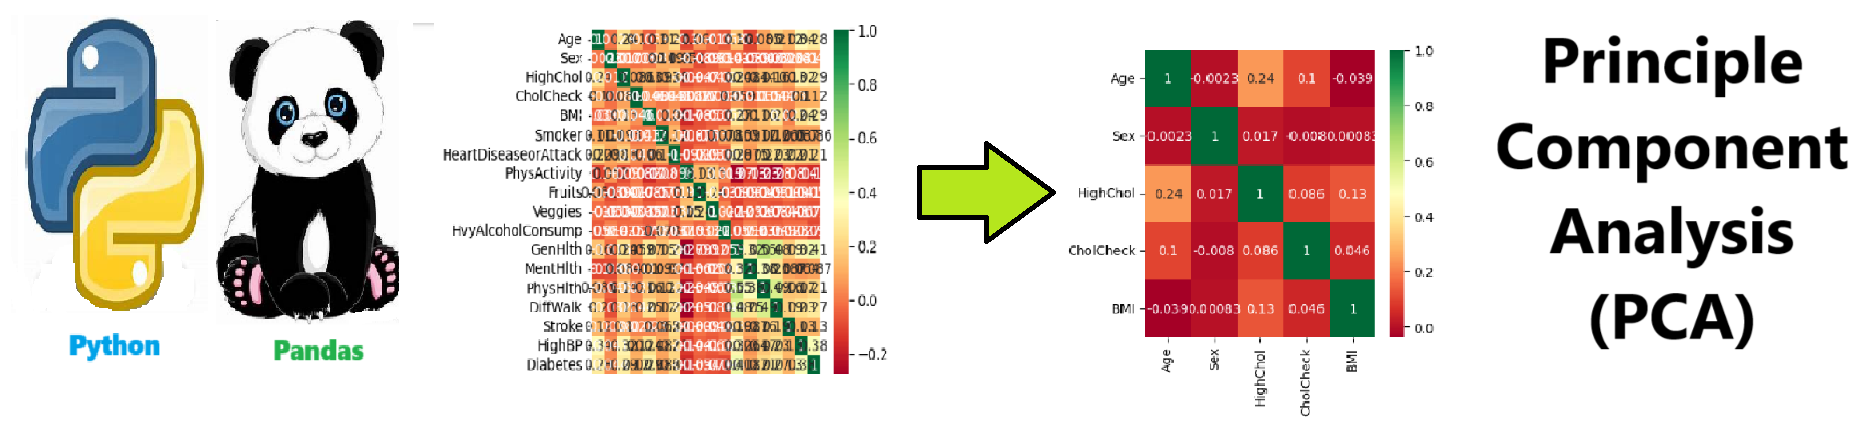

# Principal Component Analysis
#### by Joe Eberle started on 05_16_2023

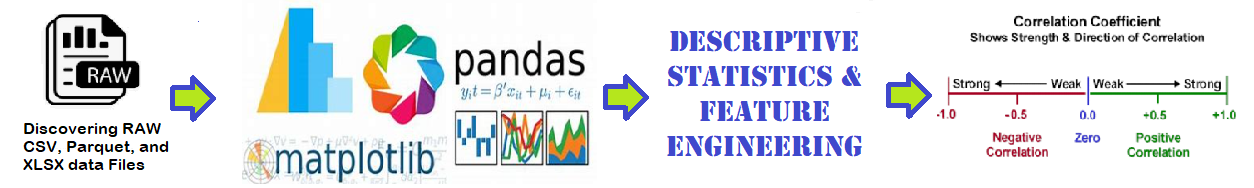


Principal Component Analysis (PCA) is a dimensionality reduction technique widely used in data science. It helps in transforming a high-dimensional dataset into a lower-dimensional representation while retaining most of the relevant information. PCA achieves this by identifying the principal components, which are new variables that are linear combinations of the original features. These components are ordered based on the amount of variation they capture in the data, with the first component explaining the maximum variance and subsequent components explaining decreasing amounts.

PCA is primarily used for two main purposes in data science. Firstly, it aids in data visualization by reducing the dataset's dimensionality while preserving the significant variation. This allows analysts and data scientists to visualize and explore complex datasets more easily, often in two or three dimensions. Secondly, PCA is used for feature extraction or dimensionality reduction in machine learning tasks. By reducing the number of input features, PCA simplifies the modeling process, reduces computational complexity, and prevents overfitting, especially in cases where the original features are highly correlated.

Overall, PCA provides a powerful tool for understanding and analyzing complex datasets. It helps uncover the underlying patterns and relationships between variables, simplifies data visualization, and facilitates efficient machine learning workflows by reducing dimensionality. Its wide-ranging applications span across various domains, including image and signal processing, genetics, finance, and social sciences, making it an essential technique in the data scientist's toolkit.

In [1]:
import pandas as pd #Pandas is high performance data manipulation 
import matplotlib.pyplot as plt   # matplot is for python graphics
import numpy as np   #numpy is for array processing
import seaborn  as sns
# Import all of the libraries you need  !pip install pandas_profiling
import ydata_profiling # provides descriptive statistics in html for any dataframe
import display_descriptive as dd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import talking_code as tc 

## Optional Step 0 - Intitiate Configuration Settings and name the overall solution

In [2]:
import configparser 
config = configparser.ConfigParser()
cfg = config.read('config.ini')  

solution_name = 'principal component analysis'

## Optional Step 0 - Intitiate Quick logging and settings

In [3]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_start(solution_name, start_time) 
ql.set_speaking_log(False)
ql.set_speaking_steps(True)
ql.pvlog('info',f'Process {solution_name} Step 0 - Initializing and starting Process.') 

Process principal component analysis Step 0 - Initializing and starting Process.


In [4]:
explaining_teaching = False 
if explaining_teaching:
    
    tc.say('Principal Component Analysis (PCA) is a dimensionality reduction technique widely used in data science. ')
    tc.say('It helps in transforming a high-dimensional dataset into a lower-dimensional representation while retaining most of the relevant information.  ')
    tc.say('PCA achieves this by identifying the principal components, which are new variables that are linear combinations of the original features. ')
    tc.say('These components are ordered based on the amount of variation they capture in the data, with the first component explaining the maximum variance ')
    tc.say('and subsequent components explaining decreasing amounts. ')

    tc.say('PCA is primarily used for two main purposes in data science. Firstly, it aids in data visualization by reducing the datasets dimensionality while preserving the significant variation.  ')
    tc.say('This allows analysts and data scientists to visualize and explore complex datasets more easily, often in two or three dimensions.  ')

    tc.say('Overall, PCA provides a powerful tool for understanding and analyzing complex datasets. ')
    tc.say('It helps uncover the underlying patterns and relationships between variables, simplifies data visualization,') 
    tc.say('and facilitates efficient machine learning workflows by reducing dimensionality. Its wide-ranging applications span across various domains, ')
    tc.say('including image and signal processing, genetics, finance, and social sciences, making it an essential technique in the data scientists toolkit.')

In [5]:
explaining_teaching = False 
if explaining_teaching:

    tc.say('The explained variance ratio in PCA represents the proportion of the total variance in the data that is explained by each principal component. It indicates how much information is retained by each component. Higher values indicate that the corresponding principal component captures a larger portion of the overall variance in the dataset.')
    tc.say('The explained variance ratio is important in PCA because it allows us to assess the significance and contribution of each component. Components with higher ratios are considered more influential in explaining the underlying structure and patterns in the data. By selecting components with high variance ratios, we can prioritize the most informative features and reduce the dimensionality of the dataset without losing critical information.')
    tc.say('In practice, the explained variance ratio helps us make informed decisions regarding the number of principal components to retain. By summing the ratios of the selected components, we can determine the cumulative proportion of variance explained. This aids in finding an optimal trade-off between dimensionality reduction and preserving the essential information required for subsequent analysis or modeling tasks.')


## Step 1 - Load ANY data set for which to run discovery or data profiling

In [6]:
ql.pvlog('info',f' Step 1 - Load ANY data set for which to run principal components Analysis') 
# heart_data_filename = 'C:\\Data_Science_Data\\Test_Data\\healthcare\\heart_data.csv'
# fetal_health_filename = 'C:\\Data_Science_Data\\Test_Data\\healthcare\\fetal_health.csv'
# stroke_data_filename = 'C:\\Data_Science_Data\\Test_Data\\healthcare\\stroke_data.csv'
# hypertension_data_filename = 'C:\\Data_Science_Data\\Test_Data\\healthcare\\hypertension_data.csv'
diabetes_data_filename = 'C:\\Data_Science_Data\\Test_Data\\healthcare\\diabetes_data.csv'
# aihs_data_filename = 'C:\\working_directory\\excel\\AIHS_patient.xlsx'
df = pd.read_csv(diabetes_data_filename)
data_set_name = 'diabetes'
ql.pvlog('info',f' Step 1b - Loaded data set {data_set_name} that contains {df.shape[0]} rows and {df.shape[1]} columns.') 

 Step 1 - Load ANY data set for which to run principal components Analysis
 Step 1b - Loaded data set diabetes that contains 70692 rows and 18 columns.


In [7]:
df.shape

(70692, 18)

In [8]:
for idx, field in enumerate(df.columns):
    print(f"{idx},'{field}'")

0,'Age'
1,'Sex'
2,'HighChol'
3,'CholCheck'
4,'BMI'
5,'Smoker'
6,'HeartDiseaseorAttack'
7,'PhysActivity'
8,'Fruits'
9,'Veggies'
10,'HvyAlcoholConsump'
11,'GenHlth'
12,'MentHlth'
13,'PhysHlth'
14,'DiffWalk'
15,'Stroke'
16,'HighBP'
17,'Diabetes'


In [9]:
# Optional Cancer example 
from sklearn.datasets import load_breast_cancer 
cancer=load_breast_cancer() 
print(cancer.keys())
print(cancer['DESCR'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

In [10]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
ql.pvlog('info',f'Process {solution_name} Step 2 - Define a function that takes any Data frame and performs PCA ranking process.') 
def perform_pca(dataframe, top_n=None):
    # Get column names
    column_names = dataframe.columns.tolist()

    # Standardize the data
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(dataframe)

    # Perform PCA
    pca = PCA()
    principal_components = pca.fit_transform(standardized_data)

    # Calculate explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_

    # Create a DataFrame to store results
    results = pd.DataFrame(
        {'Feature': column_names,
         'Explained Variance Ratio': explained_variance_ratio})

    # Sort the results by the explained variance ratio in descending order
    results.sort_values(by='Explained Variance Ratio', ascending=False, inplace=True)

    # Add PCA Rank column
    results['PCA Rank'] = range(1, len(results) + 1)

    # Limit the number of principal components if specified
    if top_n is not None:
        results = results.head(top_n)

    return results


Process principal component analysis Step 2 - Define a function that takes any Data frame and performs PCA ranking process.


In [11]:
pca_df = perform_pca(df)
pca_df.head(30)

,Feature,Explained Variance Ratio,PCA Rank
0,Age,0.193508,1
1,Sex,0.086946,2
2,HighChol,0.072799,3
3,CholCheck,0.067118,4
4,BMI,0.058074,5
5,Smoker,0.055559,6
6,HeartDiseaseorAttack,0.052801,7
7,PhysActivity,0.049868,8
8,Fruits,0.048123,9
9,Veggies,0.044278,10


In [12]:
feature_list = pca_df['Feature'].unique()

In [13]:
top_5_features = feature_list[:5]
print(top_5_features)

df_reduced_pca = df[top_5_features]

df_reduced_pca.head()

['Age' 'Sex' 'HighChol' 'CholCheck' 'BMI']


,Age,Sex,HighChol,CholCheck,BMI
0,4.0,1.0,0.0,1.0,26.0
1,12.0,1.0,1.0,1.0,26.0
2,13.0,1.0,0.0,1.0,26.0
3,11.0,1.0,1.0,1.0,28.0
4,8.0,0.0,0.0,1.0,29.0


Optional Process principal component analysis Step 3  - Dispaly a correlation matrix for all fields in the data frame.


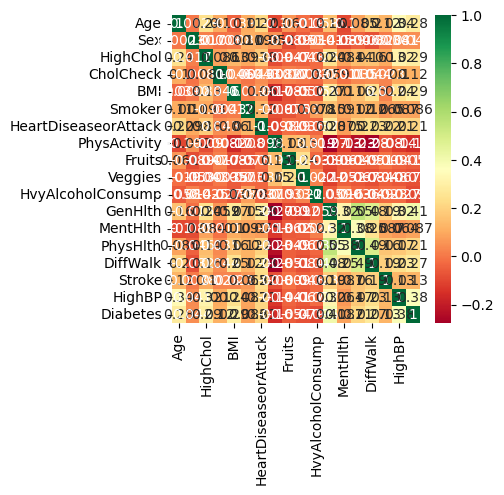

In [24]:
optional_correlation_heatmap = True

if optional_correlation_heatmap:
    ql.pvlog('info',f'Optional Process {solution_name} Step 3  - Dispaly a correlation matrix for all fields in the data frame.') 

    correlation_matrix = df.corr()     #establish a correlation matrix for all fields
    top_correlation_features = correlation_matrix.index
    plt.figure(figsize=(4,4))
    g=sns.heatmap(df[top_correlation_features].corr(),annot=True,cmap="RdYlGn")

Optional Process principal component analysis Step 3  - Dispaly a correlation matrix for all fields in the data frame.


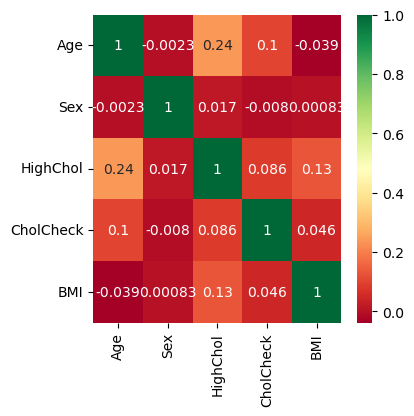

In [23]:
optional_correlation_heatmap = True

if optional_correlation_heatmap:
    ql.pvlog('info',f'Optional Process {solution_name} Step 3  - Dispaly a correlation matrix for all fields in the data frame.') 

    correlation_matrix = df_reduced_pca.corr()     #establish a correlation matrix for all fields
    top_correlation_features = correlation_matrix.index
    plt.figure(figsize=(4,4))
    g=sns.heatmap(df[top_correlation_features].corr(),annot=True,cmap="RdYlGn")

## Optional Step 4 - Render descriptive statistics and profile every feature or Column of the Dataset

In [16]:
optional_descriptive_statistics = False

if optional_descriptive_statistics:
    ql.pvlog('info',f'Optional Process {solution_name} Step 4  - Display Descriptive statistics for the data frame.') 
    data_set_name = 'Diabetes'
    dd.display_descriptive_statistics(dd.get_descriptive_statistics(df,data_set_name))

## Step 0 - Process End - display log

In [17]:
# Calculate and classify the process performance 
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  
ql.pvlog('info',f'Optional Process {solution_name} Step 0  - Process Complete - historical log appended.') 

2023-09-05 17:18:18,408 - INFO - START principal component analysis =============================================
2023-09-05 17:18:18,408 - INFO - START principal component analysis Start Time = 2023-09-05 17:18:18
2023-09-05 17:18:18,408 - INFO - principal component analysis Step 0 - Initialize the configuration file parser
2023-09-05 17:18:18,428 - INFO - Imported existing <module 'comtypes.gen' from 'C:\\Users\\josep\\anaconda3\\lib\\site-packages\\comtypes\\gen\\__init__.py'>
2023-09-05 17:18:18,428 - INFO - Using writeable comtypes cache directory: 'C:\Users\josep\anaconda3\lib\site-packages\comtypes\gen'
2023-09-05 17:18:23,993 - INFO - Process principal component analysis Step 0 - Initializing and starting Process.
2023-09-05 17:18:28,606 - INFO -  Step 1 - Load ANY data set for which to run principal components Analysis
2023-09-05 17:18:35,399 - INFO -  Step 1b - Loaded data set diabetes that contains 70692 rows and 18 columns.
2023-09-05 17:18:42,575 - INFO - Process principal

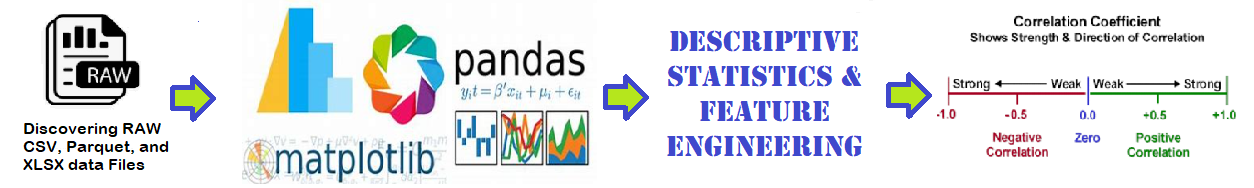